In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## World Reference Frame

**Different calibration images lead to different World Reference Frames**.
You can actually do your calibration by **moving the chessboard**, but the software sees those transformations as if you were **moving the camera**.

**Of course you can also move the camera to acquire the various calibration images.**

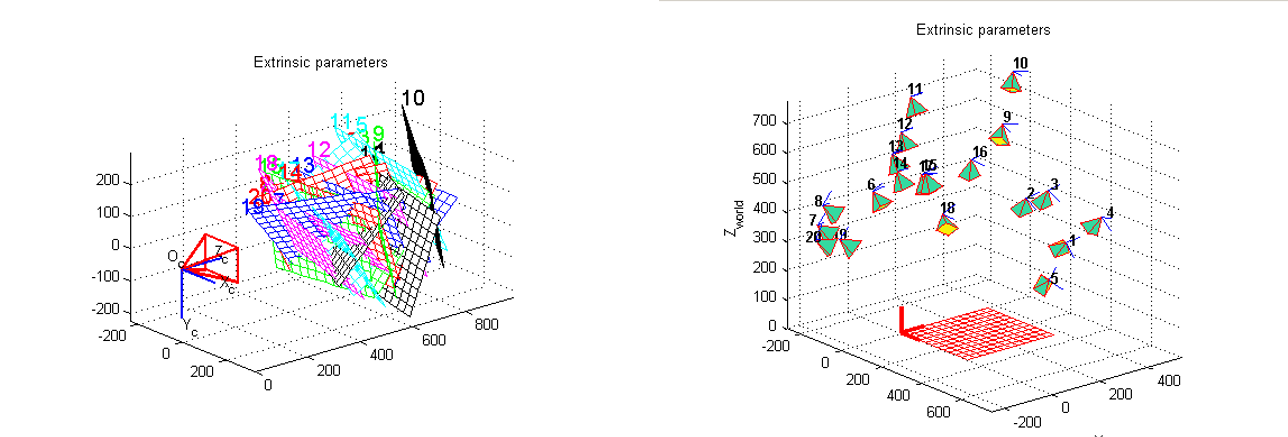

The position of the origin of the WRF on the chessboard is arbitrary, and different packages define it differently.

OpenCV > 2.2 places it so that:
* the **origin** lays on the **first row or column starting and ending with black squares**
* the resulting **z axis** in a **right-handed** reference frame **points away from the camera**.

Note that, in OpenCV to define the chessboard we use **the number of internal corners**.

chessboards/0.jpg


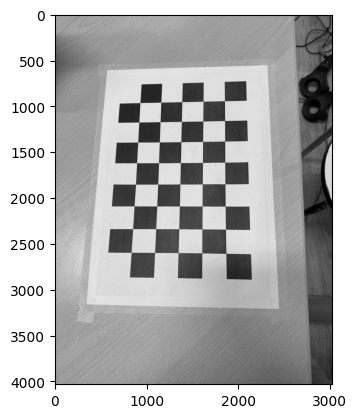

In [10]:
dirname = "chessboards/"
img_names = [dirname + str(i) + ".jpg" for i in range(13)]
print(img_names[0])

img = cv2.imread(img_names[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [11]:
pattern_size = (8,5) # number of inner corner, (columns, rows) for OpenCV
square_size = 26.5 #mm

# Use "found, corners = cv2.findChessboardCorners(img, pattern_size)" to detect corner in an image.
# "found" will be true if and only if all the 8x5 (40) corners will be detected in the image. 
# If the image is too dark or too bright the algorithm may fail to detect corners. 
found, corners = cv2.findChessboardCorners(img, pattern_size)
print("Found: ", found)

Found:  True


In [12]:
# Do cornerSubPix only if chessboard found is True
if found:
    #Refining corner position to subpixel iteratively until criteria max_count=30 or criteria_eps_error=1 is satisfied
    term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 1)
    #Image Corners 
    cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)

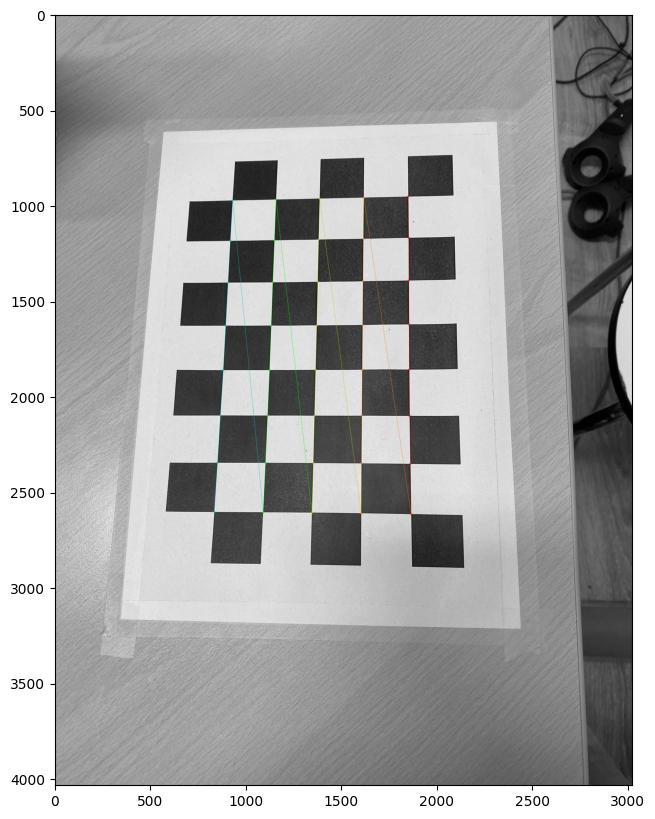

In [13]:
# visualize the founded corners
vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawChessboardCorners(vis, pattern_size, corners, found)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
#Let us create the 3D coordinate for each corner of the chessboard. 
indices = np.indices(pattern_size, dtype=np.float32)
print(indices)
#Since we know that the distance between the corners is exactly 26.5mm we have 
# to multiply these indices by square_size to get the real 3D x,y coordinates
indices *= square_size
print("Shape of indices: " , indices.shape)
print(indices)

[[[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]
  [2. 2. 2. 2. 2.]
  [3. 3. 3. 3. 3.]
  [4. 4. 4. 4. 4.]
  [5. 5. 5. 5. 5.]
  [6. 6. 6. 6. 6.]
  [7. 7. 7. 7. 7.]]

 [[0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]]]
Shape of indices:  (2, 8, 5)
[[[  0.    0.    0.    0.    0. ]
  [ 26.5  26.5  26.5  26.5  26.5]
  [ 53.   53.   53.   53.   53. ]
  [ 79.5  79.5  79.5  79.5  79.5]
  [106.  106.  106.  106.  106. ]
  [132.5 132.5 132.5 132.5 132.5]
  [159.  159.  159.  159.  159. ]
  [185.5 185.5 185.5 185.5 185.5]]

 [[  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]
  [  0.   26.5  53.   79.5 106. ]]]


In [15]:
#We need a list of 3D-2D pairs. Since 2D points are expressed by OpenCV 
#convention (x, y), we need to do the same for the 3D points
print(indices.shape)
coords_3D = np.transpose(indices, [2, 1, 0])
print("Transpose shape: " , coords_3D.shape)
coords_3D = coords_3D.reshape(-1, 2)
print(coords_3D.shape)

#Planar assumption (z=0) we need to add 0 as 3rd coordinate 
pattern_points = np.concatenate([coords_3D, np.zeros([coords_3D.shape[0], 1], dtype=np.float32)], axis=-1)
print(pattern_points.shape)
print(pattern_points)

(2, 8, 5)
Transpose shape:  (5, 8, 2)
(40, 2)
(40, 3)
[[  0.    0.    0. ]
 [ 26.5   0.    0. ]
 [ 53.    0.    0. ]
 [ 79.5   0.    0. ]
 [106.    0.    0. ]
 [132.5   0.    0. ]
 [159.    0.    0. ]
 [185.5   0.    0. ]
 [  0.   26.5   0. ]
 [ 26.5  26.5   0. ]
 [ 53.   26.5   0. ]
 [ 79.5  26.5   0. ]
 [106.   26.5   0. ]
 [132.5  26.5   0. ]
 [159.   26.5   0. ]
 [185.5  26.5   0. ]
 [  0.   53.    0. ]
 [ 26.5  53.    0. ]
 [ 53.   53.    0. ]
 [ 79.5  53.    0. ]
 [106.   53.    0. ]
 [132.5  53.    0. ]
 [159.   53.    0. ]
 [185.5  53.    0. ]
 [  0.   79.5   0. ]
 [ 26.5  79.5   0. ]
 [ 53.   79.5   0. ]
 [ 79.5  79.5   0. ]
 [106.   79.5   0. ]
 [132.5  79.5   0. ]
 [159.   79.5   0. ]
 [185.5  79.5   0. ]
 [  0.  106.    0. ]
 [ 26.5 106.    0. ]
 [ 53.  106.    0. ]
 [ 79.5 106.    0. ]
 [106.  106.    0. ]
 [132.5 106.    0. ]
 [159.  106.    0. ]
 [185.5 106.    0. ]]


In [16]:
#The process must be repeated for each image aquisistion of the chessboard
def processImage(filename):
    print('processing {}'.format(filename))
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # Check image loaded correctly
    if img is None:
        print("Failed to load", filename)
        return None
    # Finding corners
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    if found:
        # Refining corner position
        term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 5, 1)
        cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
    else:
        print('chessboard not found')
        return None
    print('OK')
    return corners.reshape(-1, 2)

In [17]:
corners_list = [processImage(fn) for fn in img_names]

pattern_points_list = [pattern_points for i in range(len(img_names))]

processing chessboards/0.jpg
OK
processing chessboards/1.jpg
OK
processing chessboards/2.jpg
OK
processing chessboards/3.jpg
OK
processing chessboards/4.jpg
OK
processing chessboards/5.jpg
OK
processing chessboards/6.jpg
OK
processing chessboards/7.jpg
OK
processing chessboards/8.jpg
OK
processing chessboards/9.jpg
OK
processing chessboards/10.jpg
OK
processing chessboards/11.jpg
OK
processing chessboards/12.jpg
OK


**cv2.calibrateCamera()** returns:


* RMS (Root Mean Square Error): **Reprojection error in pixel** using the estimated camera parameters. The lower it is the better calibration you obtain. Usually it should be in a range **between 0.1 and 1** in good calibrations. If it is much larger than 1 you did some mistakes during the calibration process.

* camera_matrix: **Intrinsics parameters** of the camera expressed as 3x3 matrix

* dist_coefs: **lens distorsion** coefficents expressed as 1x5 array.

* rvecs: **rotations** of the cameras **for each chessboard image**. It is an array of dimension Nx3 where N are the number of images where you found the chessboard during calibration while 3 are the 3 DOF of the rotations.

* tvecs: **translations** of the cameras **for each chessboard image**. It is an array of dimension Nx3 where N are the number of images where you found the chessboard during calibration while 3 are the coordiante of the 3D translation vectors.

In [18]:
# Getting the width and height of the images
h, w = cv2.imread(img_names[0], cv2.IMREAD_GRAYSCALE).shape[:2]

# Calibrating Camera
rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(pattern_points_list, corners_list, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())

print("Number of rotation vectors",len(rvecs))
print("rotation vectors:", rvecs)
print("Number of traslation vectors",len(tvecs))
print("translation vectors", tvecs)


RMS: 1.0129362940305224
camera matrix:
 [[3.07457577e+03 0.00000000e+00 1.51161098e+03]
 [0.00000000e+00 3.08121682e+03 2.00739565e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 2.67470058e-01 -1.55714631e+00 -8.10039790e-04  1.82532301e-03
  2.42187810e+00]
Number of rotation vectors 13
rotation vectors: (array([[-0.11913763],
       [ 0.21820156],
       [ 1.57070046]]), array([[-0.156849  ],
       [ 0.46398488],
       [ 1.80389216]]), array([[-0.5003864 ],
       [-0.01915772],
       [ 1.62800429]]), array([[-0.03395517],
       [-0.47910414],
       [-1.40284104]]), array([[-0.03395517],
       [-0.47910414],
       [-1.40284104]]), array([[-0.49950673],
       [-0.06138792],
       [-1.73505772]]), array([[-0.5003864 ],
       [-0.01915772],
       [ 1.62800429]]), array([[-0.15652205],
       [ 0.58131463],
       [ 1.87052312]]), array([[0.48000403],
       [0.54134073],
       [1.48139886]]), array([[0.22763227],
       [0.3555912 ],
     

In [19]:
# If we need the rotation matrix starting from a rotation vector rvec or vice-versa
rotation_matrix = cv2.Rodrigues(rvecs[0])[0]
print("R shape: ", rotation_matrix.shape)
print(rotation_matrix)


translation_matrix = tvecs[0]
print("T shape", translation_matrix.shape)

extrinsics_matrix = np.concatenate([rotation_matrix, translation_matrix], axis=1)
print("RT shape: ", extrinsics_matrix.shape)
print(extrinsics_matrix)

R shape:  (3, 3)
[[-1.37339525e-02 -9.97997155e-01  6.17499555e-02]
 [ 9.77038058e-01 -2.62384411e-04  2.13064694e-01]
 [-2.12621757e-01  6.32582770e-02  9.75084806e-01]]
T shape (3, 1)
RT shape:  (3, 4)
[[-1.37339525e-02 -9.97997155e-01  6.17499555e-02  3.81880759e+01]
 [ 9.77038058e-01 -2.62384411e-04  2.13064694e-01 -1.19851706e+02]
 [-2.12621757e-01  6.32582770e-02  9.75084806e-01  3.54641426e+02]]


[[3.07457577e+03 0.00000000e+00 1.51161098e+03]
 [0.00000000e+00 3.08121682e+03 2.00739565e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[3.50380486e+03 0.00000000e+00 1.51500578e+03]
 [0.00000000e+00 3.49820275e+03 2.01354722e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


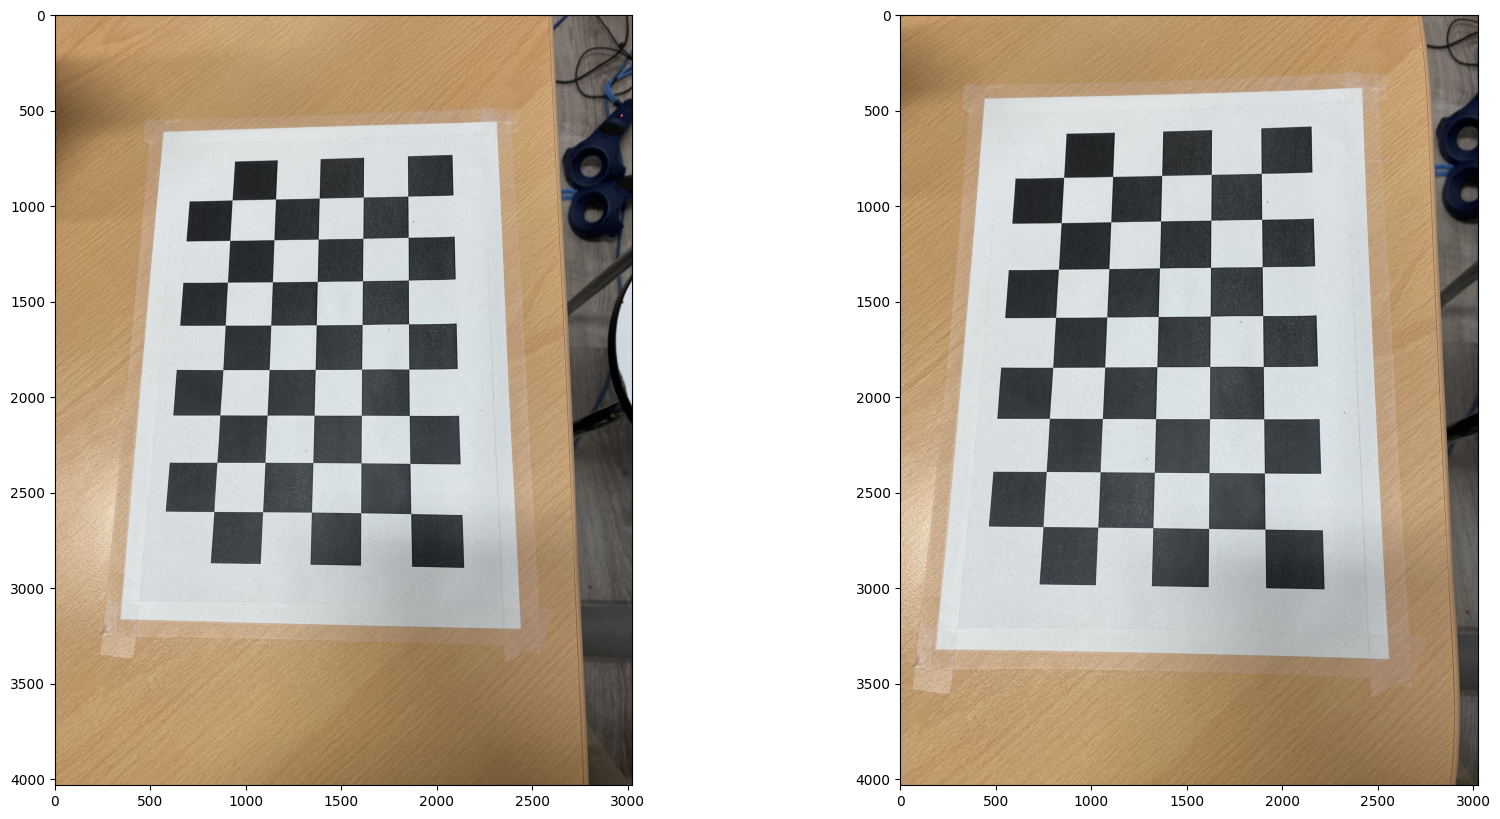

In [20]:
# We know the "lens distorsions" and the "intrisics parameters" we can undistort 
# images. We need five parameters to model camera distortion:  [k1,k2,k3,p1,p2]
# which are the five values returned by the function cv2.calibrateCamera in the 
# dist_coefs variable

# Finding the new optical camera matrix (1 is to get black external pixels, 0 otherwise)
print(camera_matrix)
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 0, (w, h))
print(new_camera_matrix)

# Find a mapping function from distorted image to undistorted image
mapx,mapy = cv2.initUndistortRectifyMap(camera_matrix, dist_coefs, None, new_camera_matrix, (w,h), 5)

# Apply the mapping
img = cv2.imread(img_names[0])
img_undistorted = cv2.remap(img, mapx , mapy, cv2.INTER_LINEAR)

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_undistorted, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
# Due to the choice of the WRF associated with calibration images, in each of 
# them we consider only 3D points with z=0. Accordingly, the PPM boils down to 
# a simpler transformation defined by a 3x3 matrix

homography = cv2.findHomography(pattern_points_list[0], corners_list[0])[0]
print("Homography (all points)", homography)


points3D_4 = pattern_points_list[0][[0, 10, 30, 39], :2].astype(np.float32)
points2D_4 = corners_list[0][[0, 10, 30, 39]].astype(np.float32)

homography_4 = cv2.getPerspectiveTransform(points3D_4,points2D_4)
print("Homography (4 points)", homography_4)

Homography (all points) [[-9.74381597e-01 -8.51444137e+00  1.84784722e+03]
 [ 7.47886692e+00  3.32480853e-01  9.52076424e+02]
 [-5.60517747e-04  1.63158468e-04  1.00000000e+00]]
Homography (4 points) [[ 6.73668229e+13 -1.34733646e+14  1.84813098e+03]
 [ 2.10333912e+14 -4.20667824e+14  9.50052795e+02]
 [ 8.08462128e+10 -1.61692426e+11  1.00000000e+00]]


Points in 3D:  [182.20215079 177.46060986   0.        ] [ 36.67018511 181.06594704   0.        ]
Pen lenght 145.58mm


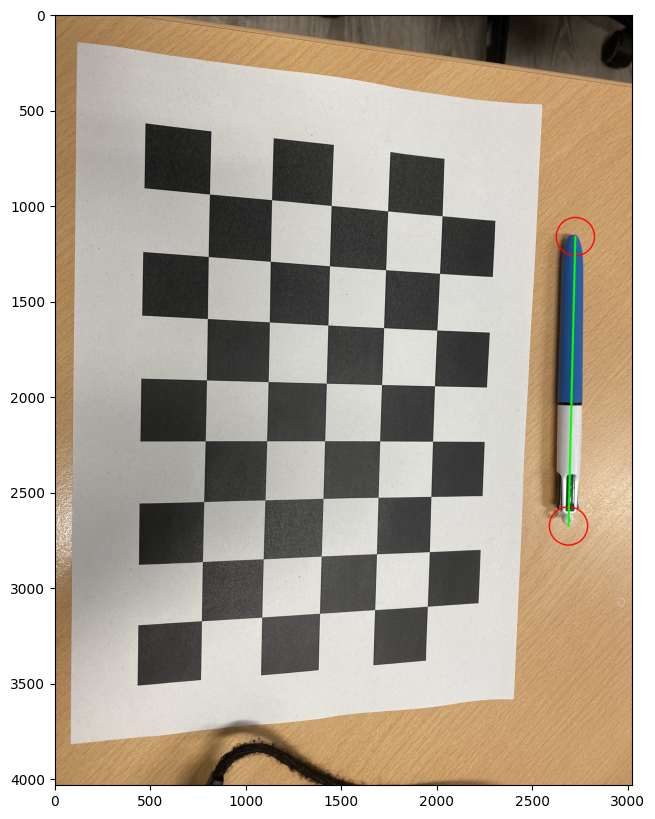

In [34]:
#Exercise: Measure the lenght of an object in 3D in mm
image_name = "pen.jpg"
image = cv2.imread(image_name)

# find the corners in the new image
corners_chessboard_pen = (8,5)
found, corners = cv2.findChessboardCorners(image, corners_chessboard_pen) #from 3D to 2D

# Finding homography between the two sets of points (you can use "pattern_points")
pattern_points_list = [pattern_points for i in range(len(img_names))]
homography = cv2.findHomography(pattern_points_list[0], corners)[0]

# # 2D points from the two ends of the pen: (2722, 1160) and (2686, 2675)
point2D_homogeneous_a = (2722, 1160, 1)
point2D_homogeneous_b = (2686, 2675, 1)

# Project in 3D the 2D points
point3D_homogeneous_a = np.matmul(np.linalg.inv(homography), point2D_homogeneous_a)
point3D_a = point3D_homogeneous_a/point3D_homogeneous_a[-1]
point3D_a[-1] = 0

point3D_homogeneous_b = np.matmul(np.linalg.inv(homography), point2D_homogeneous_b)
point3D_b = point3D_homogeneous_b/point3D_homogeneous_b[-1]
point3D_b[-1] = 0

print("Points in 3D: ", point3D_a, point3D_b)

# Drawing line and circles
cv2.circle(image, (point2D_homogeneous_a[0], point2D_homogeneous_a[1]), 100, (0,0,255), 5)
cv2.circle(image, (point2D_homogeneous_b[0], point2D_homogeneous_b[1]), 100, (0,0,255), 5)
cv2.line(image, (point2D_homogeneous_a[0], point2D_homogeneous_a[1]),  (point2D_homogeneous_b[0], point2D_homogeneous_b[1]),(0,255,0),10)

# Compute the length of the pen in mm
dist = np.sqrt((point3D_a[0] - point3D_b[0])**2+((point3D_a[1] - point3D_b[1])**2 ))
print("Pen lenght {:.2f}mm".format(dist))

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

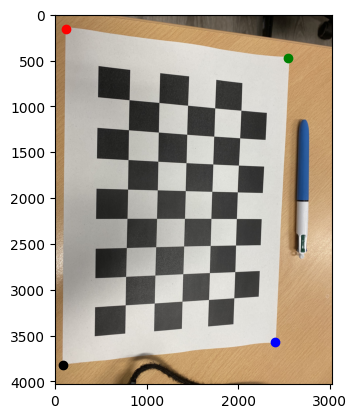

In [35]:
# Removal of perspective deformation 

image_name = "pen.jpg"
image = cv2.imread(image_name)

# we have the ordered coordinates
rect = np.array([[124, 160], [2548, 472], [2404, 3572], [93, 3823]], dtype = "float32")
(tl, tr, br, bl) = rect
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.plot(rect[0,0], rect[0,1], 'ro') #tl
plt.plot(rect[1,0], rect[1,1], 'go') #tr
plt.plot(rect[2,0], rect[2,1], 'bo') #br
plt.plot(rect[3,0], rect[3,1], 'ko') #bl
plt.show()

# compute the width of the new image, which will be the maximum distance between 
# bottom-right and bottom-left x-coordinates or the top-right and top-left 
# x-coordinates
widthA = 
widthB = 
maxWidth = max(int(widthA), int(widthB))

# compute the height of the new image, which will be the maximum distance 
# between the top-right and bottom-right y-coordinates or the top-left and 
# bottom-left y-coordinates
heightA = 
heightB = 
maxHeight = max(int(heightA), int(heightB))

# now that we have the dimensions of the new image, construct the set of 
# destination points to obtain a "birds eye view", (i.e. top-down view) of the 
# image
dst = np.array([
      #your code here
    ], dtype = "float32")


# compute the perspective transform matrix
M = 

# warp the image points to obtain a bird eye view
warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.show()